In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gráficos de Barras

**¿Qué es un Gráfico de Barra (barplot)?**

Los gráficos de barra o barplots son uno de los tipos de gráficos más utilizados. Nos permiten mostrar la relación entre una variable numérica y una categórica. 


Para este notebook, usaremos la siguiente base de datos para aprender a crear gráficos de barra, que habla sobre automóviles y algunos de sus parámetros:


  Número |Nombre  | Descripción 
---------|--------|------------------
 1       |mpg     | Miles/(US) gallon
 2       |cyl     | Number of cylinders
 3       |disp    | Displacement (cu.in.)
 4       |hp      | Gross horsepower
 5       |drat    | Rear axle ratio
 6       |wt      | Weight (1000 lbs)
 7       |qsec    | 1/4 mile time
 8       |vs      | Engine (0 = V-shaped, 1 = straight)
 9       |am      | Transmission (0 = automatic, 1 = manual)
 10      |gear    | Number of forward gears
 11      |carb    | Number of carburetors


In [2]:
# Recordemos instalar pydataset
!pip install pydataset

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
from pydataset import data

In [4]:
mtcars = data("mtcars")
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Nuestro primer gráfico de barras

**¿Cuántos autos tienen transmisión de tipo automático vs manual?**

1. Los gráficos de barra nos permiten responder esta pregunta fácilmente de manera visual.
2. Para esto solo debemos graficar la variable categórica ``am`` que encondea el tipo de transmisión (**0: automática, 1:manual**) vs la variable númerica correspondiente al conteo de estas categorias.
3. Antes de graficar pre-procesaremos los datos para que la información sea más clara tanto como para nosotros, como para el lector y el computador. 

In [5]:
# En esta celda reemplazamos los 0 y 1 por Automático y Manual respectivamente.
mtcars['am'] = mtcars['am'].map({0:'Automático', 1:'Manual'})
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,Automático,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,Automático,3,2


**Nuestro primer gráfico de barras:**

Estamos casi listos para graficar la información requerida. Sin embargo, note que en nuestra base de datos no existe explícitamente una columna que tenga el número de autos con transmisión automática o  manual. Para solucionar esto hay tres opciones.

## Opción 1 - Matplotlib

Nos creamos una tabla de frecuencias que contenga la información que queremos graficar. Para esto utilizamos `groupby()`, y contamos cuantos automóviles automáticos y manuales hay.

In [6]:
mtcars_grouped = mtcars['am'].groupby(mtcars["am"]).count()
mtcars_grouped

am
Automático    19
Manual        13
Name: am, dtype: int64

Ahora, podemos usar la función de `matplotlib` para hacer gráficos de barras. Veamos un ejemplo.

<BarContainer object of 2 artists>

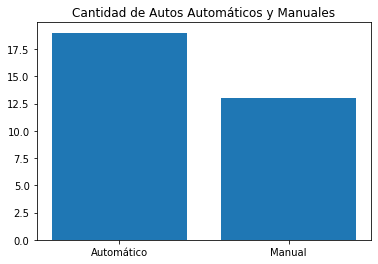

In [14]:
plt.title("Cantidad de Autos Automáticos y Manuales")
plt.bar(mtcars_grouped.keys(), mtcars_grouped)

Recordemos que además podemos hacer este gráfico con el estilo XKCD.

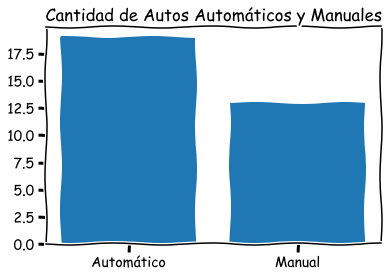

In [16]:
with plt.xkcd():
    plt.title("Cantidad de Autos Automáticos y Manuales")
    plt.bar(mtcars_grouped.keys(), mtcars_grouped)

La desventaja de esto, es que a veces queremos simplemente pasar el DataFrame, y que el lenguaje se encargue de hacer la visualización por nosotros. Por lo mismo, vamos a ver dos opciones más automáticas.

## Opcion 2 - Función de Pandas

Le decimos a `Pandas` que se encargue de contar por nosotros. Para esto utilizaremos la función `value_counts()` que le indica al "eje y" que debe contar las frecuencias observadas para las categorias de la variable categorica asignada al "eje x".



Text(0, 0.5, 'count')

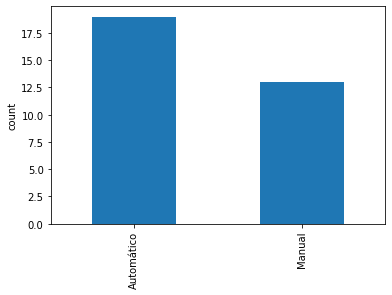

In [17]:
ax = mtcars["am"].value_counts().plot(kind="bar")
ax.set_ylabel("count")

Cabe destacar que `Pandas`, por debajo, está usando `matplotlib`. Por lo mismo, en el caso de querer las proporciones, podemos ejecutar el siguiente código, que mezcla código de `matplotlib` con la instrucción de `Pandas`.

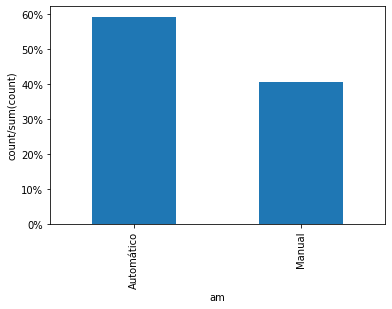

In [18]:
import matplotlib.ticker as mtick

ax = mtcars["am"].value_counts(normalize=True).plot(kind="bar")
ax.set_ylabel("count/sum(count)")
ax.set_xlabel(mtcars["am"].name);

# Esta función permite transaformar la escala del eje y a procentajes
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

## Opción 3 - Seaborn

La tercera opción es utilizar **Seaborn**, una librería que se construyó en base a `matplotlib`. Esta librería está más orientada a _Data Science_, y por lo mismo, provee una interfaz directa para trabajar con DataFrames.

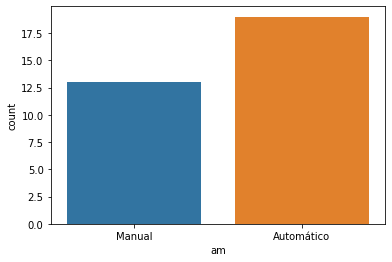

In [22]:
import seaborn as sns

ax = sns.countplot(x="am", data=mtcars)

Además, en `seaborn` podemos cambiar el tema (ojo, hay formas de hacer esto también en `matplotlib`).

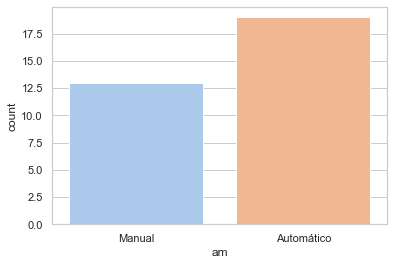

In [23]:
sns.set_theme(style="whitegrid", palette="pastel")
ax = sns.countplot(x="am", data=mtcars)

O el tema por defecto. Puedes ver [más detalles aquí](https://seaborn.pydata.org/generated/seaborn.set_theme.html).

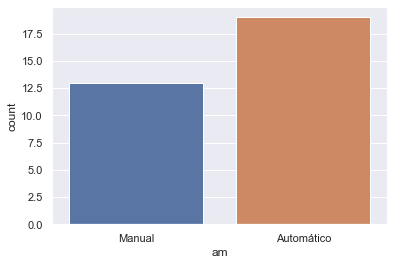

In [24]:
sns.set_theme()
ax = sns.countplot(x="am", data=mtcars)

# Utilizando 2 o más variables categóricas

Podemos utilizar los gráficos de barra para estudiar más de una variable categórica al mismo tiempo. En este ejemplo consideremos la variable `vs` que denota el tipo de motor: (**0: V-shaped, 1:Straight**).

In [25]:
# En este módulo reemplazamos los 0 y 1 por V-shaped y Straight respectivamente.
mtcars['vs'] = mtcars['vs'].map({0: 'V-shaped', 1: 'Straight'})
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Straight,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Straight,Automático,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,Automático,3,2


El siguiente grafico nos permite ver facilmente cual es la distribución del tipo de motor para los diferentes tipos de transmisión (Automática vs Manual). **Ojo**: Para este tipo de gráfico es necesario tener una columna que indique que tipo de categoria es, para luego sumar su cantidad. Lo que vamos a hacer a continuación se conoce como crear variables _dummy_.

In [36]:
mtcars_dummy = pd.get_dummies(mtcars, columns=['vs'])
mtcars_dummy.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,am,gear,carb,vs_Straight,vs_V-shaped
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,Manual,4,4,0,1
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,Manual,4,4,0,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Manual,4,1,1,0
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Automático,3,1,1,0
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,Automático,3,2,0,1


In [37]:
mtcars_dummy_grouped = mtcars_dummy.groupby(mtcars_dummy["am"]).agg({'vs_V-shaped':'sum','vs_Straight':'sum'})
mtcars_dummy_grouped

,vs_V-shaped,vs_Straight
am,,
Automático,12,7
Manual,6,7


Text(0, 0.5, 'count')

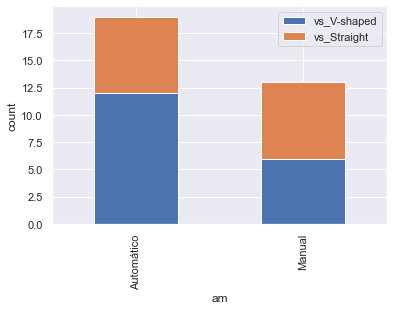

In [38]:
ax =mtcars_dummy_grouped.plot.bar(stacked=True)
ax.set_ylabel("count")

In [39]:
# Para obtener porcentajes vamos a sumar el total de cada columna con:
mtcars_dummy_grouped.sum()

vs_V-shaped    18
vs_Straight    14
dtype: int64

In [40]:
# Creamos un nuevo dataframe pero con formato en porcentaje, esto es simplemente diviendo por el total de vehiculos
mtcars_dummy_grouped_v2 = mtcars_dummy_grouped/ mtcars_dummy_grouped.sum().sum()

In [41]:
mtcars_dummy_grouped_v2

,vs_V-shaped,vs_Straight
am,,
Automático,0.3750,0.21875
Manual,0.1875,0.21875


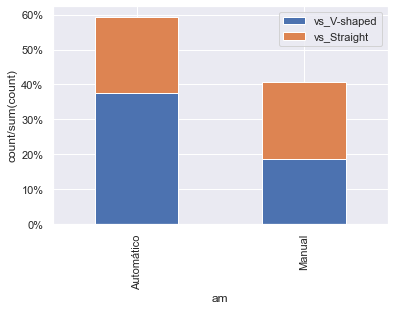

In [42]:
ax = mtcars_dummy_grouped_v2.plot.bar(stacked=True)
# Cambia el formato a procentaje
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel("count/sum(count)");

## Posiciones para las barras

Ya vimos como hacer un gráfico _stacked_, ahora vamos a ver como crear más de una barra.

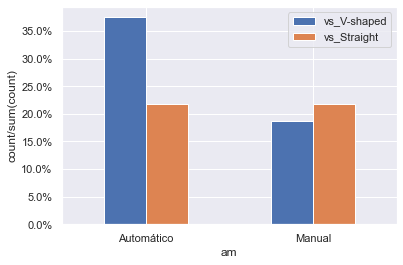

In [43]:
# Con rot=0 giramos los labels del eje X
ax = mtcars_dummy_grouped_v2.plot.bar(rot=0)
# Cambia el formato a procentaje
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel("count/sum(count)");

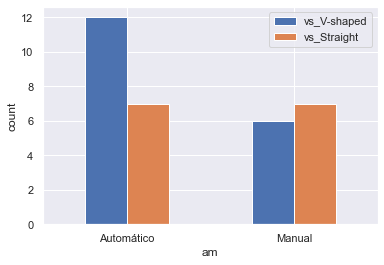

In [44]:
# Aquí la versión sin porcentajes
ax = mtcars_dummy_grouped.plot.bar(rot=0)
ax.set_ylabel("count");

## Más de una barra en Seaborn

Veamos cómo podemos replicar este gráfico en Seaborn, partiendo deel _dataset_ sin las variables _dummy_.

In [45]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Straight,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Straight,Automático,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,Automático,3,2


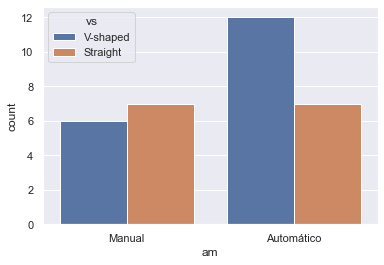

In [46]:
ax = sns.countplot(x="am", hue="vs", data=mtcars)

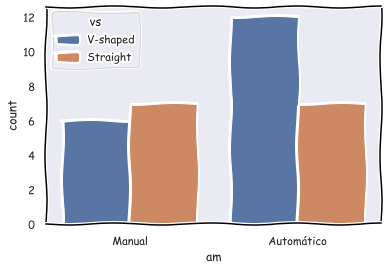

In [47]:
with plt.xkcd():
    ax = sns.countplot(x="am", hue="vs", data=mtcars)

## Distribución del número de cilindros por tipo de auto: automático vs manual

Vamos a ver la distribución del número de cilindros por tipo de auto. Aquí, a pesar de que la variable cyl es cuantitativa (discreta), la vamos a tratar como una variable categorica.

In [48]:
mtcars_dummy_2 = pd.get_dummies(mtcars, columns=['cyl'])
mtcars_dummy_2.head(5)

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_4,cyl_6,cyl_8
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46,V-shaped,Manual,4,4,0,1,0
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02,V-shaped,Manual,4,4,0,1,0
Datsun 710,22.8,108.0,93,3.85,2.320,18.61,Straight,Manual,4,1,1,0,0
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44,Straight,Automático,3,1,0,1,0
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02,V-shaped,Automático,3,2,0,0,1


In [49]:
mtcars_dummy_grouped_2 = mtcars_dummy_2.groupby(mtcars_dummy_2["am"]).agg({'cyl_8': 'sum', 'cyl_6': 'sum', 'cyl_4': 'sum'})
mtcars_dummy_grouped_2

,cyl_8,cyl_6,cyl_4
am,,,
Automático,12,4,3
Manual,2,3,8


Text(0, 0.5, 'count')

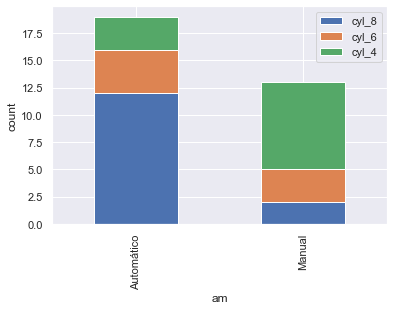

In [50]:
ax = mtcars_dummy_grouped_2.plot.bar(stacked=True)
ax.set_ylabel("count")

**¿Cuál es la distribución del número de cilindros por tipo de auto (automático vs manual), y por tipo de motor (V-shaped vs Straight)?**

Veamos cómo graficar más de una variable categórica.

In [52]:
import matplotlib.pyplot as plt

In [53]:
mtcars_straight = mtcars[mtcars["vs"]=="Straight"]
#notar que el operador - no puede ser parte de un numbre en python.
mtcars_V_shaped = mtcars[mtcars["vs"]=="V-shaped"]

In [54]:
mtcars_straight_dummy = pd.get_dummies(mtcars_straight, columns=['cyl'])
mtcars_V_shaped_dummy = pd.get_dummies(mtcars_V_shaped, columns=['cyl'])

In [55]:
#Notar que no existen 8 cyl para el tipo straight
mtcars_straight_dummy.head(5)

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_4,cyl_6
Datsun 710,22.8,108.0,93,3.85,2.320,18.61,Straight,Manual,4,1,1,0
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44,Straight,Automático,3,1,0,1
Valiant,18.1,225.0,105,2.76,3.460,20.22,Straight,Automático,3,1,0,1
Merc 240D,24.4,146.7,62,3.69,3.190,20.00,Straight,Automático,4,2,1,0
Merc 230,22.8,140.8,95,3.92,3.150,22.90,Straight,Automático,4,2,1,0


In [56]:
# Notar que la agrupacion debe ser consistente con la existencia de las columnas, en la primera linea, no existen cyl_8
mtcars_straight_dummy_group = mtcars_straight_dummy.groupby(mtcars_straight_dummy["am"]).agg({'cyl_6': 'sum', 'cyl_4': 'sum'})

mtcars_V_shaped_dummy_group = mtcars_V_shaped_dummy.groupby(mtcars_V_shaped_dummy["am"]).agg({'cyl_8': 'sum', 'cyl_6': 'sum', 'cyl_4': 'sum'})

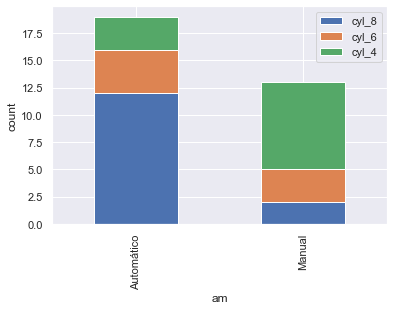

In [57]:
ax = mtcars_dummy_grouped_2.plot.bar(stacked=True)
ax.set_ylabel("count");

Text(0.5, 1.0, 'V-Shaped')

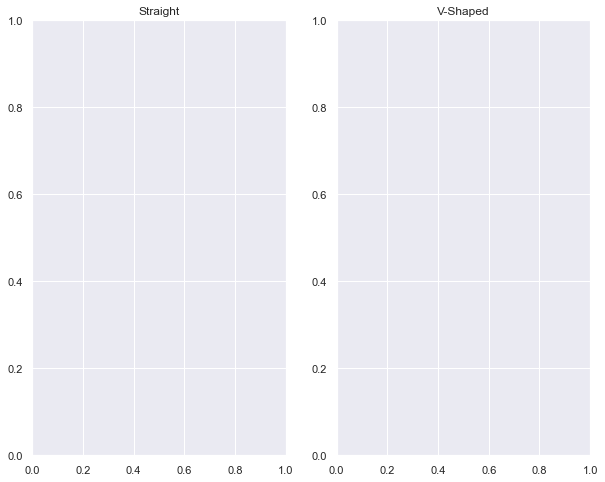

In [58]:
# Primero debemos definir nuestros ejes
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Straight')
ax2 = plt.subplot(1, 2, 2)
ax2.set_title('V-Shaped')

/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


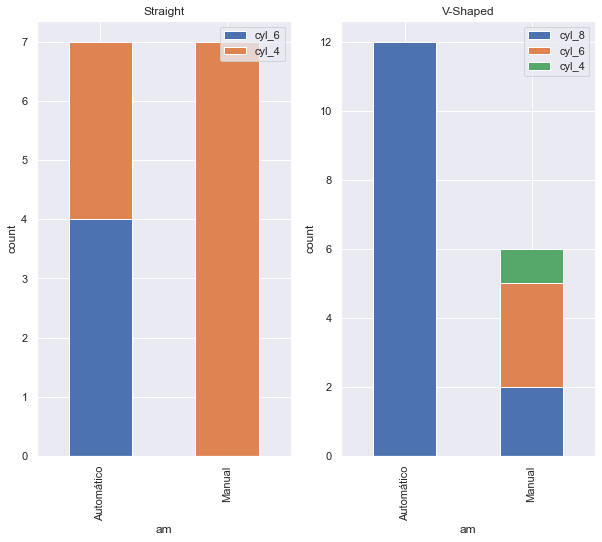

In [59]:
# Hacemos uso de los subplot para crear nuestras figuras
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Straight')
ax1 = mtcars_straight_dummy_group.plot.bar(ax=ax1,stacked=True)
ax1.set_ylabel("count")
ax1.legend(loc='upper right')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('V-Shaped')
ax2 = mtcars_V_shaped_dummy_group.plot.bar(ax=ax2,stacked=True)
ax2.set_ylabel("count")
ax2.legend(loc='upper right')

In [60]:
aux = mtcars.groupby([mtcars["am"], mtcars["vs"], mtcars["gear"], mtcars["cyl"]], as_index = False)["mpg"].count()
aux.columns=["am", "vs", "gear", "cyl", "conteo"] # renombramos las columnas
# aux = aux.set_index(["am","vs"])
aux

,am,vs,gear,cyl,conteo
0,Automático,Straight,3,4,1
1,Automático,Straight,3,6,2
2,Automático,Straight,4,4,2
3,Automático,Straight,4,6,2
4,Automático,V-shaped,3,8,12
5,Manual,Straight,4,4,6
6,Manual,Straight,5,4,1
7,Manual,V-shaped,4,6,2
8,Manual,V-shaped,5,4,1
9,Manual,V-shaped,5,6,1


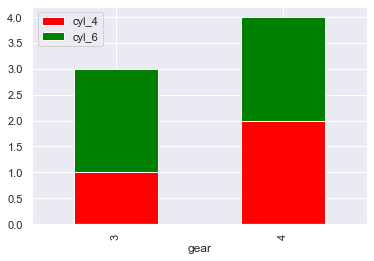

In [61]:
automatico_straight = mtcars[(mtcars["am"]=="Automático") & (mtcars["vs"]=="Straight")]
automatico_straight_dummy = pd.get_dummies(automatico_straight, columns=['cyl'])
#Notar que solo existen Automático V-shaped de 4 y 6 cyls
automatico_straight_dummy.groupby("gear").agg({"cyl_4": "sum", "cyl_6": "sum"}).plot.bar(stacked=True,color={"cyl_4":"red","cyl_6":"green","cyl_8":"blue"});

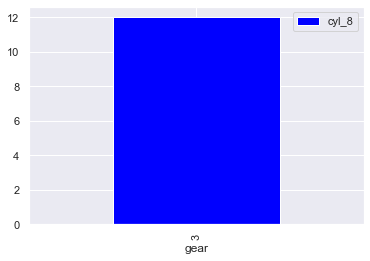

In [62]:
automatico_v_shaped = mtcars[(mtcars["am"]=="Automático")&(mtcars["vs"]=="V-shaped")]
automatico_v_shaped_dummy = pd.get_dummies(automatico_v_shaped, columns=['cyl'])
#Notar que solo existen Automático V-shaped de 8 cyls
automatico_v_shaped_dummy.groupby("gear").agg({"cyl_8":"sum"}).plot.bar(stacked=True,color={"cyl_4":"red","cyl_6":"green","cyl_8":"blue"});

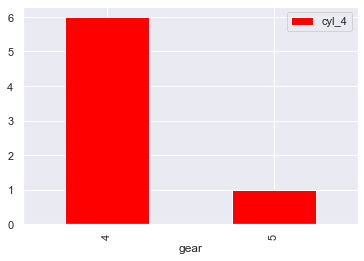

In [63]:
manual_straight = mtcars[(mtcars["am"]=="Manual")&(mtcars["vs"]=="Straight")]
manual_straight_dummy = pd.get_dummies(manual_straight, columns=['cyl'])
#Notar que solo existen Automático V-shaped de 4 cyls
manual_straight_dummy.groupby("gear").agg({"cyl_4":"sum"}).plot.bar(stacked=True,color={"cyl_4":"red","cyl_6":"green","cyl_8":"blue"});

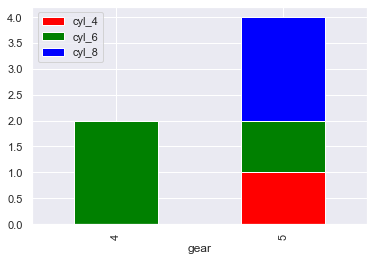

In [64]:
manual_v_shaped = mtcars[(mtcars["am"]=="Manual")&(mtcars["vs"]=="V-shaped")]
manual_v_shaped_dummy = pd.get_dummies(manual_v_shaped, columns=['cyl'])
#Notar que solo existen Automático V-shaped de 4, 6 y 8 cyls
manual_v_shaped_dummy.groupby("gear").agg({"cyl_4":"sum","cyl_6":"sum","cyl_8":"sum"}).plot.bar(stacked=True,color={"cyl_4":"red","cyl_6":"green","cyl_8":"blue"});

/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


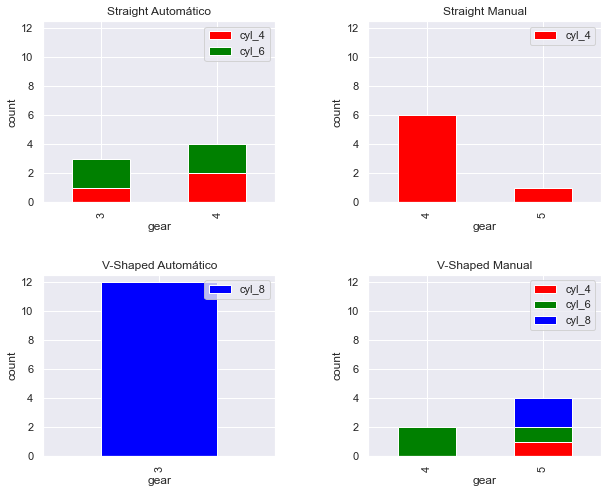

In [65]:
fig = plt.figure(figsize=(10,8))
#hspace y wspace nos permite ajustar las distancias entre los subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Straight Automático')
ax1= automatico_straight_dummy.groupby("gear").agg({"cyl_4":"sum","cyl_6":"sum"}).plot.bar(ax=ax1,stacked=True,color={"cyl_4":"red","cyl_6":"green","cyl_8":"blue"})
ax1.set_ylabel("count")
ax1.legend(loc = 'upper right')
ax1.set_ylim([0, 12.5])

ax2 = plt.subplot(2, 2, 2)
ax2.set_title('Straight Manual')
ax2= manual_straight_dummy.groupby("gear").agg({"cyl_4":"sum"}).plot.bar(ax=ax2,stacked=True,color={"cyl_4":"red","cyl_6":"green","cyl_8":"blue"})
ax2.set_ylabel("count")
ax2.legend(loc = 'upper right')
ax2.set_ylim([0, 12.5])

ax3 = plt.subplot(2, 2, 3)
ax3.set_title('V-Shaped Automático')
ax3= automatico_v_shaped_dummy.groupby("gear").agg({"cyl_8":"sum"}).plot.bar(ax=ax3,stacked=True,color={"cyl_4":"red","cyl_6":"green","cyl_8":"blue"})
ax3.set_ylabel("count")
ax3.legend(loc = 'upper right')
ax3.set_ylim([0, 12.5])

ax4 = plt.subplot(2, 2, 4)
ax4.set_title('V-Shaped Manual')
ax4 = manual_v_shaped_dummy.groupby("gear").agg({"cyl_4":"sum","cyl_6":"sum","cyl_8":"sum"}).plot.bar(ax=ax4,stacked=True,color={"cyl_4":"red","cyl_6":"green","cyl_8":"blue"})
ax4.set_ylabel("count")
ax4.legend(loc = 'upper right')
ax4.set_ylim([0, 12.5]);